In [44]:
import pandas as pd
import os
import random

In [34]:
file_list = os.listdir("data")

In [35]:
df_dict = {}
for file in file_list:
    name = file.split(".")[0]
    
    series = pd.read_csv(f"./data/{file}", index_col="Date", parse_dates=True,
                         infer_datetime_format=True)[" Close/Last"]
    
    series = series.str.replace("$","").astype("float")
    df_dict[name]  = series

In [36]:
df_dict

{'ENPH': Date
 2020-03-26    36.13
 2020-03-25    36.81
 2020-03-24    34.34
 2020-03-23    27.51
 2020-03-20    26.00
               ...  
 2019-04-02     9.35
 2019-04-01     9.26
 2019-03-29     9.23
 2019-03-28     9.08
 2019-03-27     8.80
 Name:  Close/Last, Length: 253, dtype: float64,
 'RUN': Date
 2020-03-26    12.38
 2020-03-25    12.16
 2020-03-24    11.16
 2020-03-23     9.02
 2020-03-20     8.36
               ...  
 2019-04-02    14.22
 2019-04-01    14.18
 2019-03-29    14.06
 2019-03-28    14.27
 2019-03-27    14.23
 Name:  Close/Last, Length: 253, dtype: float64,
 'SEDG': Date
 2020-03-26    90.45
 2020-03-25    89.90
 2020-03-24    85.31
 2020-03-23    69.48
 2020-03-20    69.61
               ...  
 2019-04-02    38.20
 2019-04-01    37.85
 2019-03-29    37.68
 2019-03-28    37.76
 2019-03-27    36.79
 Name:  Close/Last, Length: 253, dtype: float64,
 'VSLR': Date
 2020-03-26    4.98
 2020-03-25    5.07
 2020-03-24    4.75
 2020-03-23    4.20
 2020-03-20    4.02
     

In [37]:
df = pd.concat(df_dict.values(), axis="columns", join="inner")
df.columns = df_dict.keys()
df.head()

,ENPH,RUN,SEDG,VSLR,FSLR,SPWR
Date,,,,,,
2020-03-26,36.13,12.38,90.45,4.98,37.62,6.38
2020-03-25,36.81,12.16,89.90,5.07,34.79,6.67
2020-03-24,34.34,11.16,85.31,4.75,33.71,6.78
2020-03-23,27.51,9.02,69.48,4.20,33.07,6.16
2020-03-20,26.00,8.36,69.61,4.02,33.69,5.81


In [38]:
returns = df.pct_change()
returns.head()

,ENPH,RUN,SEDG,VSLR,FSLR,SPWR
Date,,,,,,
2020-03-26,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-25,0.018821,-0.017771,-0.006081,0.018072,-0.075226,0.045455
2020-03-24,-0.067101,-0.082237,-0.051057,-0.063116,-0.031043,0.016492
2020-03-23,-0.198893,-0.191756,-0.185559,-0.115789,-0.018985,-0.091445
2020-03-20,-0.054889,-0.073171,0.001871,-0.042857,0.018748,-0.056818


In [43]:
returns.describe()

,ENPH,RUN,SEDG,VSLR,FSLR,SPWR
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,-0.003772,0.001461,-0.002632,0.001152,0.001638,0.001271
std,0.060528,0.043647,0.042951,0.052735,0.029288,0.052580
min,-0.297973,-0.191756,-0.200747,-0.115789,-0.097430,-0.194904
25%,-0.030729,-0.019450,-0.019575,-0.025299,-0.014000,-0.023170
50%,-0.008476,-0.002117,-0.003343,-0.003482,-0.000866,-0.002934
75%,0.017973,0.014797,0.014000,0.017671,0.010861,0.022163
max,0.342751,0.288527,0.194161,0.310030,0.172564,0.242733


In [64]:
returns.corr()

,ENPH,RUN,SEDG,VSLR,FSLR,SPWR
ENPH,1.000000,0.587845,0.697469,0.507553,0.457504,0.649156
RUN,0.587845,1.000000,0.633142,0.709869,0.528704,0.626763
SEDG,0.697469,0.633142,1.000000,0.499506,0.506530,0.582480
VSLR,0.507553,0.709869,0.499506,1.000000,0.514071,0.497673
FSLR,0.457504,0.528704,0.506530,0.514071,1.000000,0.620140
SPWR,0.649156,0.626763,0.582480,0.497673,0.620140,1.000000


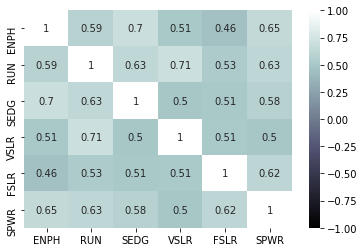

In [82]:
import seaborn as sns
sns.heatmap(returns.corr(), vmin=-1, vmax=1, cmap="bone", annot=True)

In [47]:
preweight = [random.random() for w in range(6)]
weightsum = sum(preweight)
weights = [w/weightsum for w in preweight]

In [50]:
initial = 10000
portfolio_returns = returns.dot(weights)
cumulative_returns = (1+portfolio_returns).cumprod()
cumulative_returns

Date
2020-03-26         NaN
2020-03-25    0.998493
2020-03-24    0.947783
2020-03-23    0.815927
2020-03-20    0.785197
                ...   
2019-04-02    0.961855
2019-04-01    0.957250
2019-03-29    0.939787
2019-03-28    0.938951
2019-03-27    0.919494
Length: 253, dtype: float64

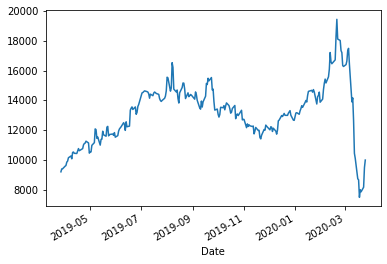

In [53]:
(initial * cumulative_returns).plot()

In [112]:
results = pd.DataFrame({
    "Weights":[],
    "Total_Return":[],
    "Risk":[],
    "Sharpe":[]
})
trials = 5000
risk_free_rate = 0.72

for run in range(trials):
    
    
    preweight = [random.random() for w in range(6)]
    weightsum = sum(preweight)
    weights = [w/weightsum for w in preweight]
    
    initial = 10000
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1+portfolio_returns).cumprod()
    
    risk = portfolio_returns.std()
#     final_value = (initial * cumulative_returns)[-1] # in case you want this
    total_return = cumulative_returns[-1]
    
    results=results.append({
        "Weights":weights,
        "Total_Return": total_return,
        "Risk": risk,
        "Sharpe": (total_return-risk_free_rate)/risk
    }, ignore_index=True)
    
results

,Weights,Total_Return,Risk,Sharpe
0,"[0.1314410743144237, 0.05670631665639297, 0.01...",0.994311,0.037066,7.400558
1,"[0.13179532332599705, 0.45715287438692975, 0.0...",0.905880,0.040199,4.624042
2,"[0.078789249584877, 0.18482326186375864, 0.041...",1.023461,0.038019,7.981897
3,"[0.23508359782909347, 0.19162651697051256, 0.1...",0.724148,0.040447,0.102548
4,"[0.22243608402757567, 0.03895931578198453, 0.0...",0.800585,0.044409,1.814618
...,...,...,...,...
4995,"[0.20787172954420785, 0.17876046619703437, 0.2...",0.727432,0.038024,0.195448
4996,"[0.28391446854725505, 0.09173923223433278, 0.0...",0.772379,0.041562,1.260257
4997,"[0.15040820572585556, 0.3864791205397877, 0.10...",0.881303,0.038580,4.180995
4998,"[0.22247306202904468, 0.22778853610769909, 0.3...",0.603340,0.040267,-2.897190


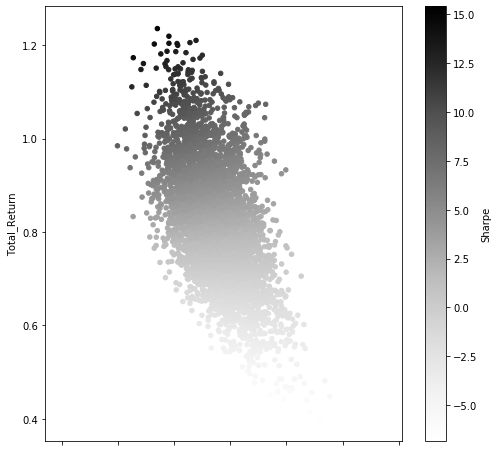

In [113]:
results.plot(kind="scatter", x="Risk", y="Total_Return", c="Sharpe", figsize=(8,8))

In [114]:
positive_yield=results[results["Total_Return"]>1]

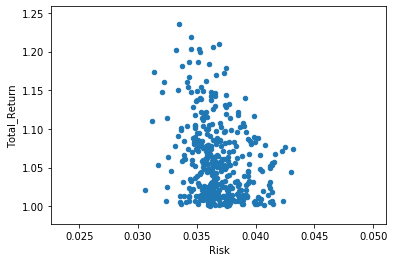

In [115]:
positive_yield.plot(kind="scatter", x="Risk", y="Total_Return")

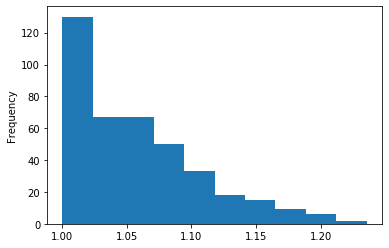

In [116]:
positive_yield["Total_Return"].plot(kind="hist")

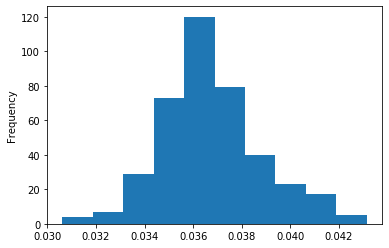

In [117]:
positive_yield["Risk"].plot(kind="hist")

In [119]:
positive_yield[positive_yield["Sharpe"]>14]

,Weights,Total_Return,Risk,Sharpe
358,"[0.007180864261019588, 0.054009948487177904, 0...",1.202472,0.033202,14.531253
2146,"[0.021310060351706867, 0.07777535777679594, 0....",1.173169,0.031325,14.466471
2626,"[0.019084323148534366, 0.35110065913171357, 0....",1.204059,0.034510,14.026764
3244,"[0.01166405074866721, 0.19165176344452034, 0.0...",1.219228,0.034507,14.467622
3695,"[0.018543313596518337, 0.2143934211545268, 0.0...",1.235532,0.033475,15.400542


In [125]:
positive_yield.loc[358]["Weights"]

[0.007180864261019588,
 0.054009948487177904,
 0.03391051433812373,
 0.30393862704554536,
 0.5100759961560688,
 0.09088404971206472]

In [126]:
positive_yield.loc[3244]["Weights"]

[0.01166405074866721,
 0.19165176344452034,
 0.0015739351937721806,
 0.31423834457372407,
 0.41903106526344386,
 0.061840840775872194]